In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib as mpl

sns.set_theme("paper", "whitegrid")

import os
import json

palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

In [63]:

results_root = '/home/kwatchar3/bss_spatial_eval/results/delaylin'

ddfs = os.listdir(results_root)
# print(ddfs)


dfs = []

for d in ddfs:
    if 'results-ok.csv' in os.listdir(os.path.join(results_root, d)):
        df = pd.read_csv(os.path.join(results_root, d, 'results-ok.csv'))
    else:
        continue
    with open(os.path.join(results_root, d, 'args.json'), "r") as f:
        args = json.load(f)
        
    if args['estim_filter_kwargs']:
        df['ldelay'], df['rdelay'] = args['estim_filter_kwargs'][0]['kwargs']['positions']
    else:
        df['ldelay'] = 0
        df['rdelay'] = 0
    dfs.append(df)
    
    # df['rdelayx'] = (df['rdelay'] * 16000).apply(np.log2).apply(lambda x: x if x > -1 else -1)
    # df['ldelayx'] = (df['ldelay'] * 16000).apply(np.log2).apply(lambda x: x if x > -1 else -1)

df = pd.concat(dfs)

df['rdelay'] = df['rdelay'].astype(float)
df['ldelay'] = df['ldelay'].astype(float)

In [16]:
# df['file'].unique()

In [62]:
df.ldelay.unique()

array([0.00025, 0.     ])

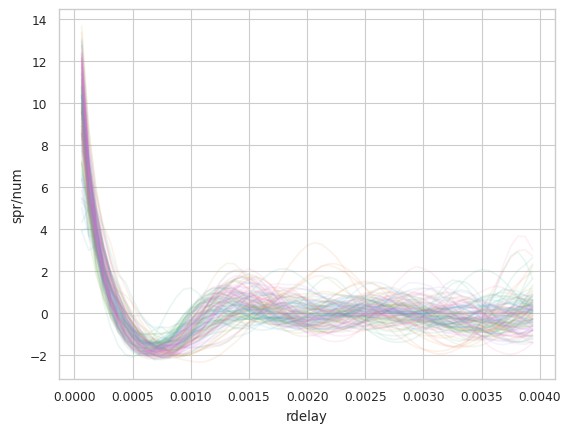

In [66]:
dfx = df[(df.est_deviation == 0) & (df.ldelay == 0) & (df.rdelay > 0)]
sns.lineplot(dfx, x='rdelay', y='spr/num', hue='file', alpha=0.1)
plt.gca().get_legend().remove()

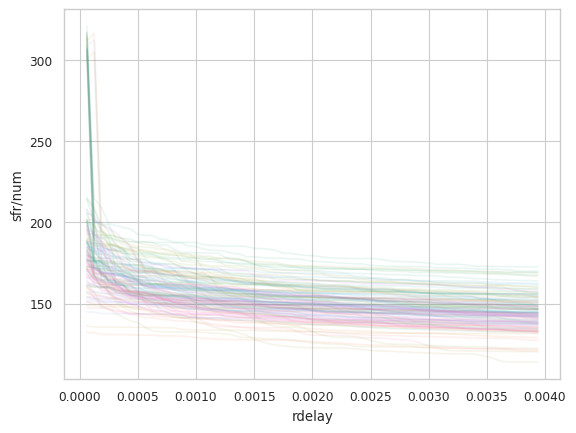

In [69]:
dfx = df[(df.est_deviation == 0) & (df.ldelay == 0) & (df.rdelay > 0)]
sns.lineplot(dfx, x='rdelay', y='sfr/num', hue='file', alpha=0.1)
plt.gca().get_legend().remove()

In [67]:
def set_axes(fig, ax, line=100):
    fig.colorbar(
        plt.cm.ScalarMappable(norm=mpl.colors.Normalize(df.rdelayx.min(), df.rdelayx.max()), cmap=palette), 
        ax=ax, label='Delay (s)', 
        pad=0.01, aspect=30, 
        # ticks=[1, 8, 64, 256, 512],
        format=lambda v, t: f"{v}"
    )
    ax.legend_.remove()
    
    if line:
        ax.axhline(line, ls=':')

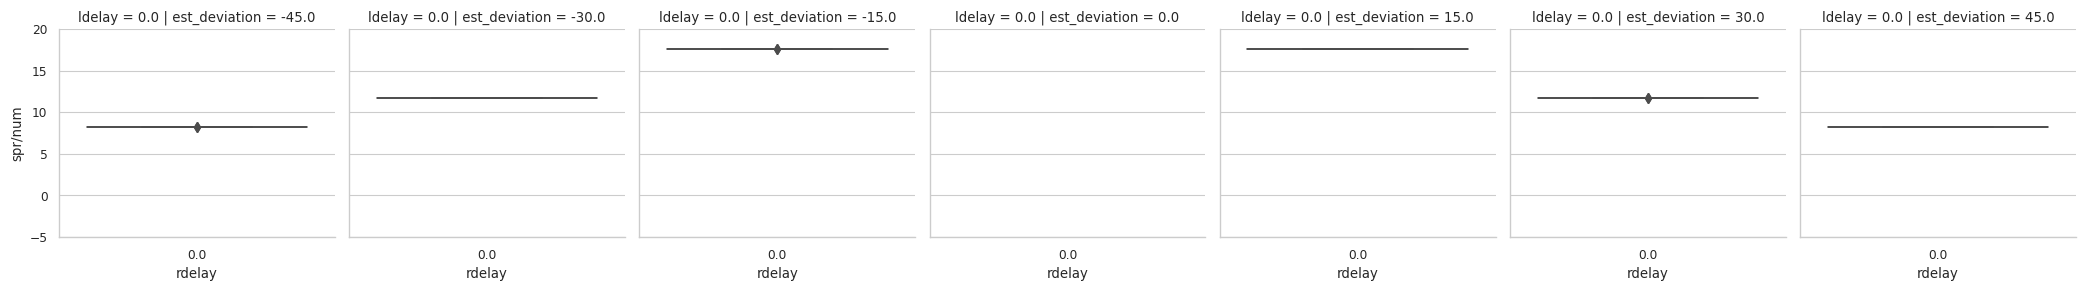

In [68]:
g = sns.FacetGrid(df[(df.ldelay < 1) & (df.rdelay == 0)], col='est_deviation', row='ldelay')
g.map_dataframe(sns.boxplot, x='rdelay', y='spr/num')
g.set(ylim=[-5, 20])

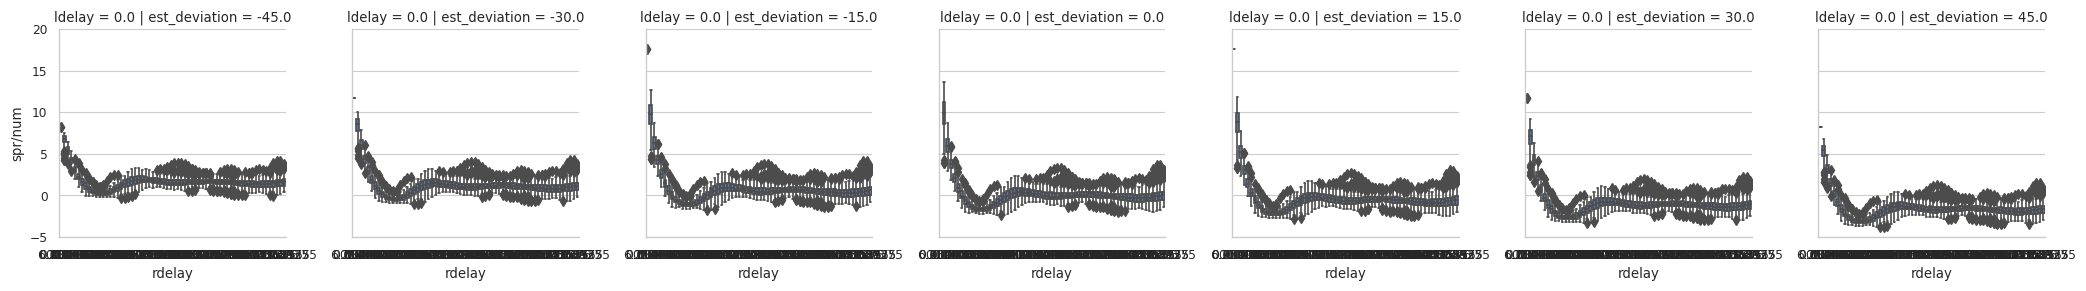

In [54]:
g = sns.FacetGrid(df[(df.ldelay < 1)], col='est_deviation', row='ldelay')
g.map_dataframe(sns.boxplot, x='rdelay', y='spr/num')
g.set(ylim=[-5, 20])

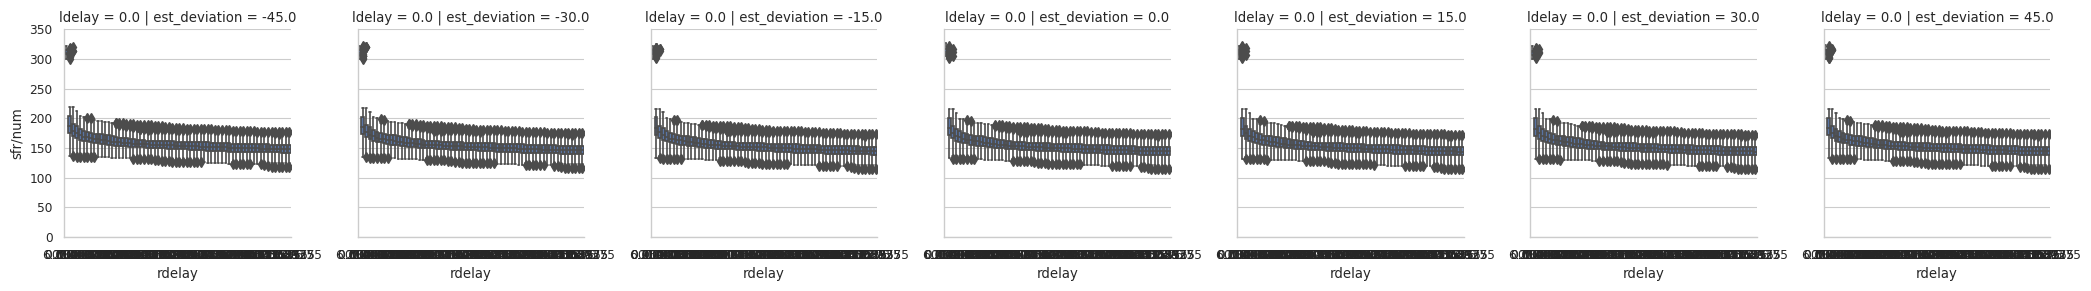

In [55]:
g = sns.FacetGrid(df[(df.ldelay < 5)], col='est_deviation', row='ldelay')
g.map_dataframe(sns.boxplot, x='rdelay', y='sfr/num')
g.set(ylim=[0, 350])

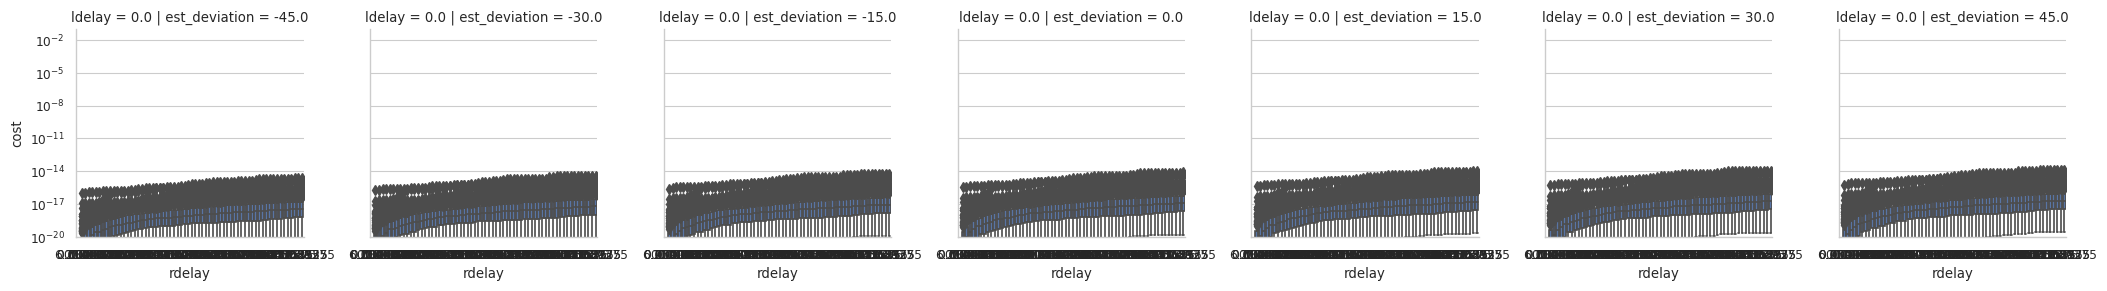

In [56]:
g = sns.FacetGrid(df[(df.ldelay < 5)], col='est_deviation', row='ldelay')
g.map_dataframe(sns.boxplot, x='rdelay', y='cost')
g.set(ylim=[1e-20, 0.1], yscale='log')